In [1]:
from eval_gamefile import *

In [3]:
evaluate_gamefile()

TypeError: evaluate_gamefile() missing 1 required positional argument: 'filename'

In [ ]:
low_game_base = evaluate_gamefile('lowgame1.pgn', depth = 3, iterative = False)


In [20]:
low_game_base2 = evaluate_gamefile('lowgame1.pgn', depth = 2, iterative = False)


d4
depth: 2, runtime: 0.06382894515991211, states visited: 139, DP hits: 0

 r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R 
 1 
 (Move.from_uci('b8c6'), 6.3500000000000005)
c5
depth: 2, runtime: 0.0730586051940918, states visited: 193, DP hits: 0

 r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R 
 1.5 
 (Move.from_uci('d4c5'), 5.8500000000000005)
c4
depth: 2, runtime: 0.07483220100402832, states visited: 168, DP hits: 0

 r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R 
 2.0 
 (Move.from_uci('c5d4'), 4.45)
d6
depth: 2, runtime: 0.12762665748596191, states visited: 316, DP hits: 0

 r n b q k b n r
p p . . p p p p
. . . p . . . .
. . p . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R 
 2.5 
 (Move.from_uci('d1a4'), 4.6000000

In [18]:
low_game_prun2 = evaluate_gamefile('lowgame1.pgn', depth = 2,eval_type = 'rule', iterative = False)


172, DP hits: 0
2 d8a5 6.550000000000001

 r n . q . r k .
. p . b p p . p
p . . p . . p .
. . p P . . N .
. . P n P . . .
. . N B . . . .
P P . . . P P P
R . . Q . R K . 
 11.0 
 (Move.from_uci('d8a5'), 6.550000000000001)
h5
depth: 1, runtime: 0.02792191505432129, states visited: 39, pruned: 0, DP hits: 2
1 g5f7 7.5
depth: 2, runtime: 0.2416074275970459, states visited: 435, pruned: 117, DP hits: 0
2 d1d2 6.45

 r n . q . r k .
. p . b p p . .
p . . p . . p .
. . p P . . N p
. . P n P . . .
. . N B . . . .
P P . . . P P P
R . . Q . R K . 
 11.5 
 (Move.from_uci('d1d2'), 6.45)
Re1
depth: 1, runtime: 0.009962320327758789, states visited: 27, pruned: 9, DP hits: 8
1 d8a5 6.4
depth: 2, runtime: 0.1904900074005127, states visited: 139, pruned: 209, DP hits: 0
2 d8b6 5.65

 r n . q . r k .
. p . b p p . .
p . . p . . p .
. . p P . . N p
. . P n P . . .
. . N B . . . .
P P . . . P P P
R . . Q R . K . 
 12.0 
 (Move.from_uci('d8b6'), 5.65)
e6
depth: 1, runtime: 0.008974075317382812, states vi

In [10]:
low_game_prun = evaluate_gamefile('lowgame1.pgn', depth = 3,eval_type = 'rule', iterative = False)



. p . . . p . .
p . . p . . p .
. . p N . . . .
. . P . P . . p
. . . B . . . b
P P . . . P P .
R . . Q R . K . 
 16.5 
 (Move.from_uci('g2h3'), 6.35)
gxh3
depth: 1, runtime: 0.003990888595581055, states visited: 21, pruned: 2, DP hits: 20
1 d8a5 6.300000000000001
depth: 2, runtime: 0.10175752639770508, states visited: 179, pruned: 153, DP hits: 158
2 f8e8 6.35
depth: 3, runtime: 0.5315456390380859, states visited: 1308, pruned: 325, DP hits: 94
3 d8e8 4.8500000000000005

 r n . q . r k .
. p . . . p . .
p . . p . . p .
. . p N . . . .
. . P . P . . p
. . . B . . . P
P P . . . P . .
R . . Q R . K . 
 17.0 
 (Move.from_uci('d8e8'), 4.8500000000000005)
Qg5+
depth: 1, runtime: 0.0019936561584472656, states visited: 5, pruned: 0, DP hits: 1
1 d1g4 6.5
depth: 2, runtime: 0.02293539047241211, states visited: 66, pruned: 17, DP hits: 28
2 g1h2 6.25
depth: 3, runtime: 0.40395069122314453, states visited: 525, pruned: 404, DP hits: 0
3 d1g4 6.4

 r n . . . r k .
. p . . . p . .
p . . p . . p .

In [14]:
# save_game_eval(low_game_prun, 'low_game_prun_3.p')
low_game_prun_3  =load_eval('low_game_prun_3.p')
low_game_cbr  =load_eval('low_game_cbr.p')
low_game_base = load_eval('low_game_base.p')
# low
print(low_game_prun_3[1])

[0, 0, 0, 0, 3.1999999999999997, 6.300000000000001, 4.3500000000000005, 6.8, 5.800000000000001, 7.2, 6.3, 8.200000000000001, 6.7, 6.9, 6.5, 7.25, 6.300000000000001, 6.65, 6.300000000000001, 6.65, 4.3500000000000005, 6.7, 3.45, 6.7, 6.0, 5.3500000000000005, 5.2, 7.1000000000000005, 4.65, 6.95, 3.75, 6.35, 4.8500000000000005, 6.4, 5.75, 6.500000000000001, 6.0, 6.4, 6.25, 6.5, 3.7, 4.300000000000001, 3.3, 4.0, 2.3000000000000003, 3.1500000000000004, 2.85, 4.1499999999999995, 2.0500000000000003, 4.300000000000001, 0.10000000000000009, 2.85, -5.05, 0.15000000000000008, -1.2499999999999998, 13.85, 10.8, 7.15, 5.75, 8.0, 6.950000000000001, 7.95, 7.800000000000001, 7.9, 6.45, 7.6, 8.3, 12.3, 9.1, 13.2, 13.399999999999999, 21.3, 21.3]


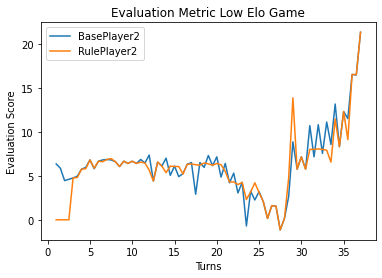

In [36]:
import matplotlib.pyplot as plt
import numpy as np
low_gameorder = np.arange(1,  1+ len(low_game_base[1])/2 , 0.5)
plt.title('Evaluation Metric Low Elo Game')
# plt.plot(low_gameorder, low_game_base[1], label = 'BasePlayer')
plt.plot(low_gameorder, low_game_base2[1], label = 'BasePlayer2')
plt.plot(low_gameorder,  low_game_prun2[1], label = 'RulePlayer2')
# plt.plot(low_gameorder,  low_game_prun_3[1], label = 'RulePlayer3')
# plt.plot(low_gameorder,  low_game_cbr[1], label = 'RulePlayer4')
plt.legend()
plt.ylabel('Evaluation Score')
plt.xlabel('Turns')
plt.savefig('low_game_eval.jpg')

In [5]:

low_game_base= load_eval('low_game_base.p')
mid_game_base= load_eval('mid_game_base.p')
high_game_base= load_eval('high_game_base.p')
low_game_cbr= load_eval('low_game_cbr.p')
mid_game_cbr= load_eval('mid_game_cbr.p')
high_game_cbr= load_eval('high_game_cbr.p')

In [38]:
from stockfish import Stockfish

In [51]:
stockfish = Stockfish("stockfish/stockfish_13")


In [53]:
stockfish = Stockfish("stockfish/stockfish_13",parameters={"Threads": 2, "Minimum Thinking Time": 1})
# stockfish.set_fen_position("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")


In [64]:
# stockfish.set_fen_position("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")
def compare_with_stockfish(eval_game):
    stockfish = Stockfish("stockfish/stockfish_13",parameters={"Threads": 2, "Minimum Thinking Time": 1})
    
    suggested_moves = eval_game[-1]
    game_configs = eval_game[2]
    evals = []
    for i in range(0, len(game_configs)-1):
        temp = game_configs[i]

        temp.push(suggested_moves[i])
        stockfish.set_fen_position(temp.fen())
        stockfish_eval = stockfish.get_evaluation()
        print(stockfish_eval)
        evals.append(stockfish_eval)
    return evals

In [ ]:
temp 

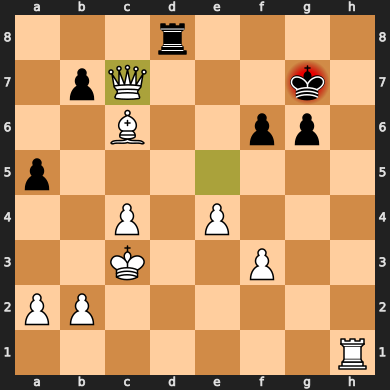

In [61]:
low_game_base[2][0]